In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
pd.set_option("display.max_columns", None) # unlimited columns

In [188]:
submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
original = pd.read_csv("original.csv")

In [189]:
train['Dataset'] = "train"
test['Dataset'] = "test"
original['Dataset'] = "original"

original.rename(columns={"Gender": "Sex"}, inplace=True) # rename Gender to Sex
original.rename(columns={"User_ID": "id"}, inplace=True) # rename User_ID to id

In [190]:
submission.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [191]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train


In [192]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Dataset
0,750000,male,45,177.0,81.0,7.0,87.0,39.8,test
1,750001,male,26,200.0,97.0,20.0,101.0,40.5,test
2,750002,female,29,188.0,85.0,16.0,102.0,40.4,test
3,750003,female,39,172.0,73.0,20.0,107.0,40.6,test
4,750004,female,30,173.0,67.0,16.0,94.0,40.5,test


In [193]:
original.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,original
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,original
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,original
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,original
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,original


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
 9   Dataset     750000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 57.2+ MB


In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
 8   Dataset     250000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 17.2+ MB


In [196]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15000 non-null  int64  
 1   Sex         15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
 9   Dataset     15000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


In [197]:
to_df = pd.concat([train, original])
df = pd.concat([train, test, original])
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,original
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,original
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,original
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,original


Leave no stone unturned

**Check categorical distribution**

<Axes: xlabel='Sex', ylabel='count'>

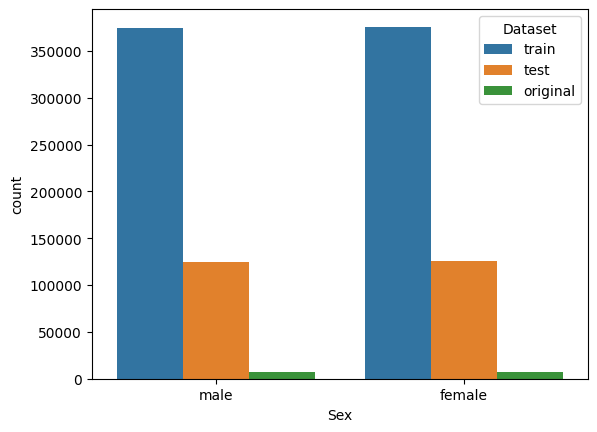

In [198]:
sns.countplot(df, x="Sex", hue="Dataset")

Same sex distribution for every dataset. **Check numerical distribution**. No nans in the dataset.

<Axes: xlabel='Heart_Rate'>

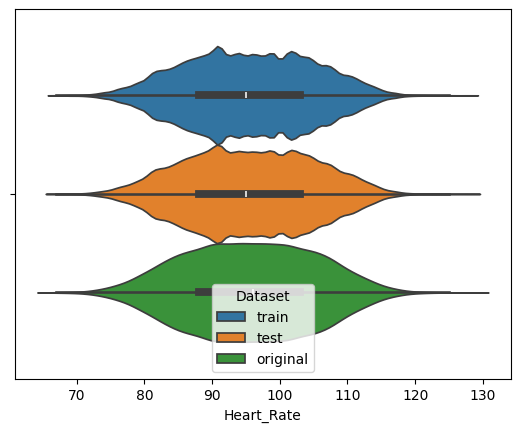

In [199]:
sns.violinplot(df, x=label, hue="Dataset")

<Axes: xlabel='Age', ylabel='count'>

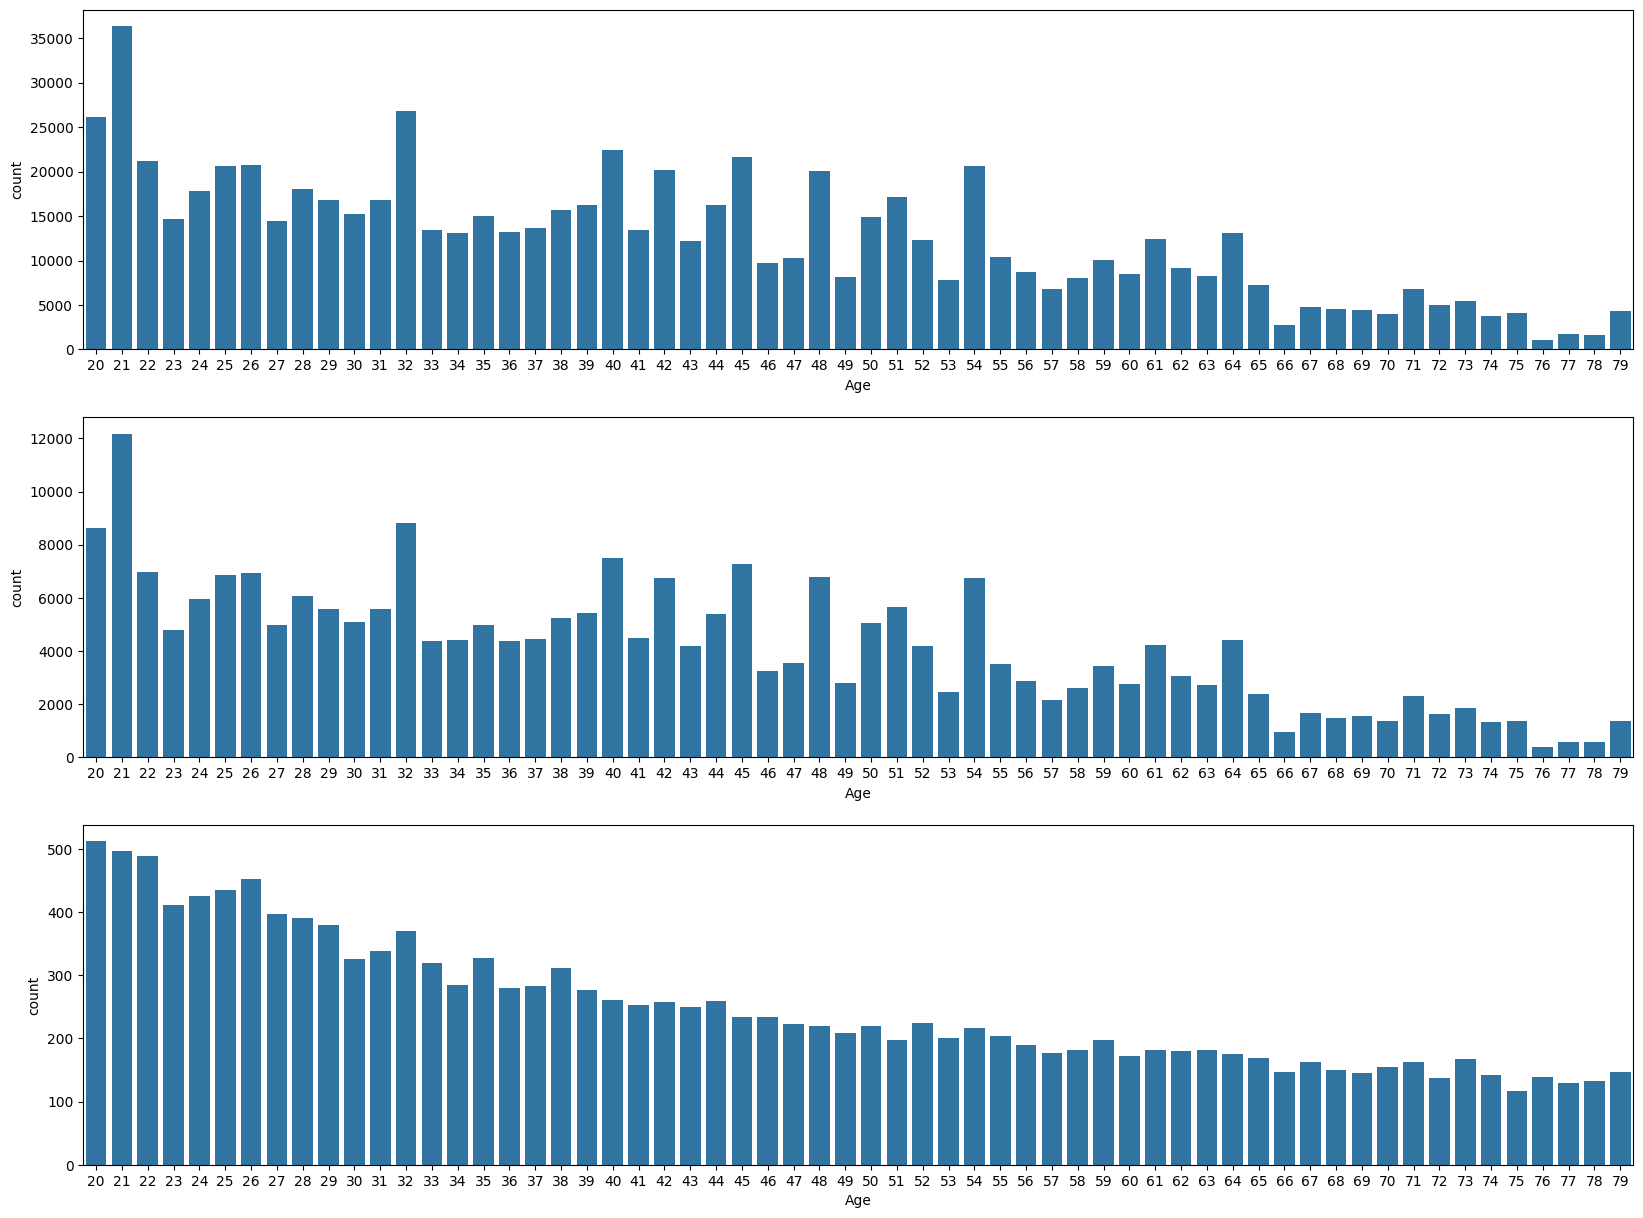

In [200]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

sns.countplot(train, x="Age",ax=axes[0])
sns.countplot(test, x="Age",ax=axes[1])
sns.countplot(original, x="Age",ax=axes[2])

Original distribution for Age seems more uniform than both train and test. train and test look very similar so most likely sampled from the same distribution. Age also doesn't have gaps in all 3 datasets. 

**Check Height**

<Axes: xlabel='Height'>

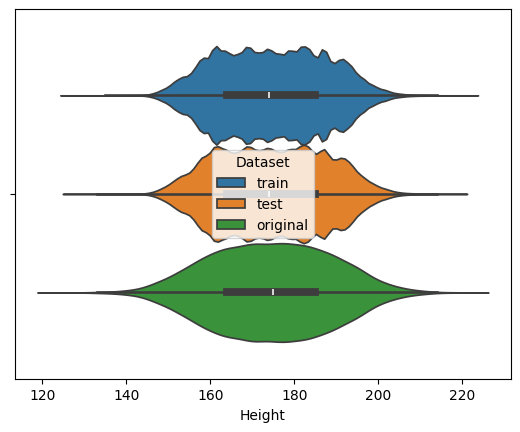

In [201]:
sns.violinplot(df, x="Height", hue="Dataset")

<Axes: xlabel='Height', ylabel='count'>

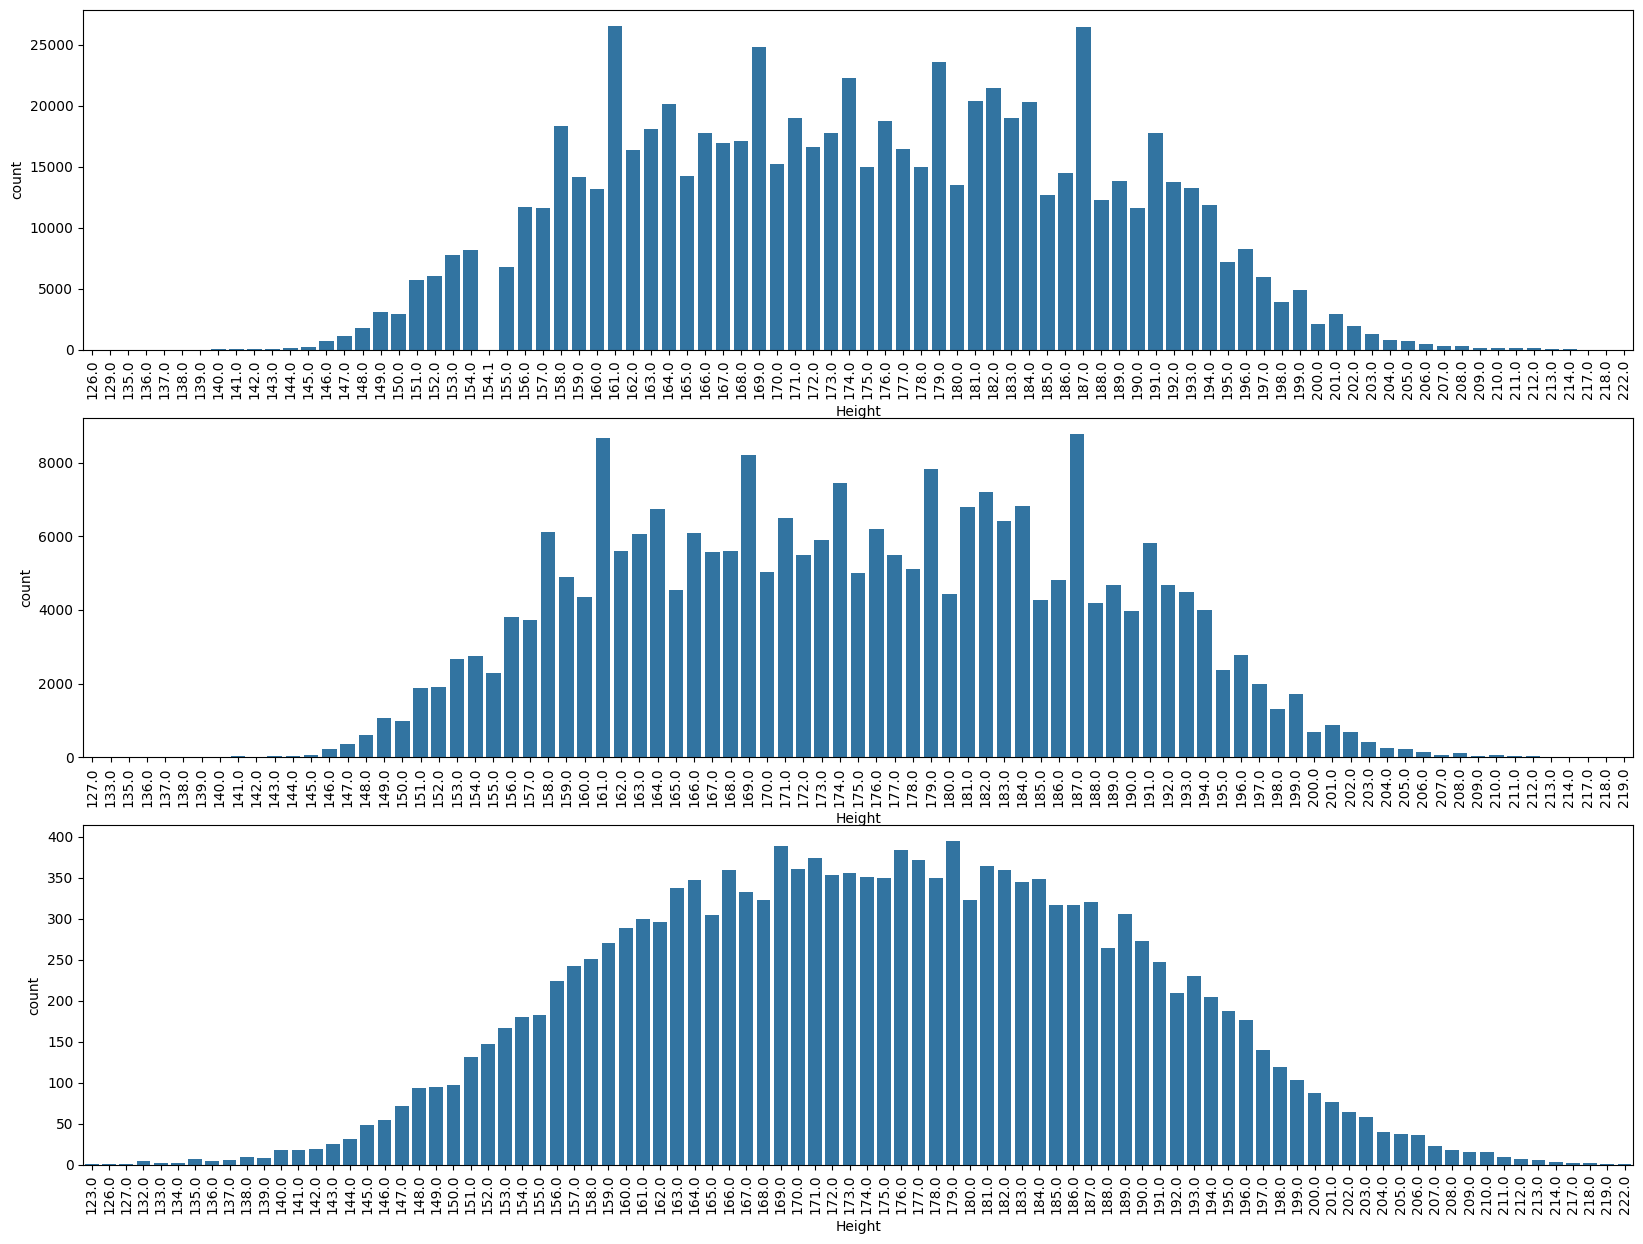

In [202]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Height",ax=axes[0])
sns.countplot(test, x="Height",ax=axes[1])
sns.countplot(original, x="Height",ax=axes[2])

In [203]:
train[train["Height"]==154.1] # odd female with 154.1 height

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
146439,146439,female,53,154.1,58.0,28.0,111.0,41.2,203.0,train


Normal distribution for Height. Similar situation just like Age. However, there is one female with Height that is a floating point at 154.1. Most likely this is in centimeters.

**Check Weight**

<Axes: xlabel='Weight'>

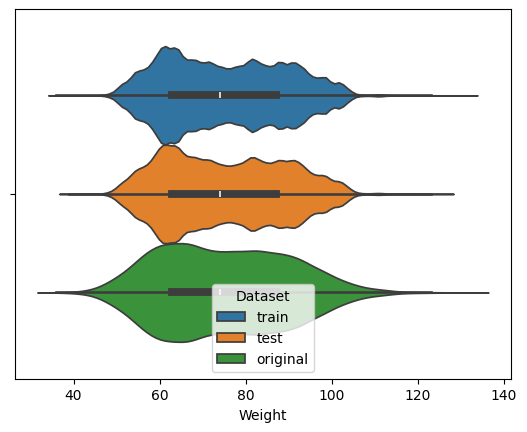

In [204]:
sns.violinplot(df, x="Weight", hue="Dataset")

<Axes: xlabel='Weight', ylabel='count'>

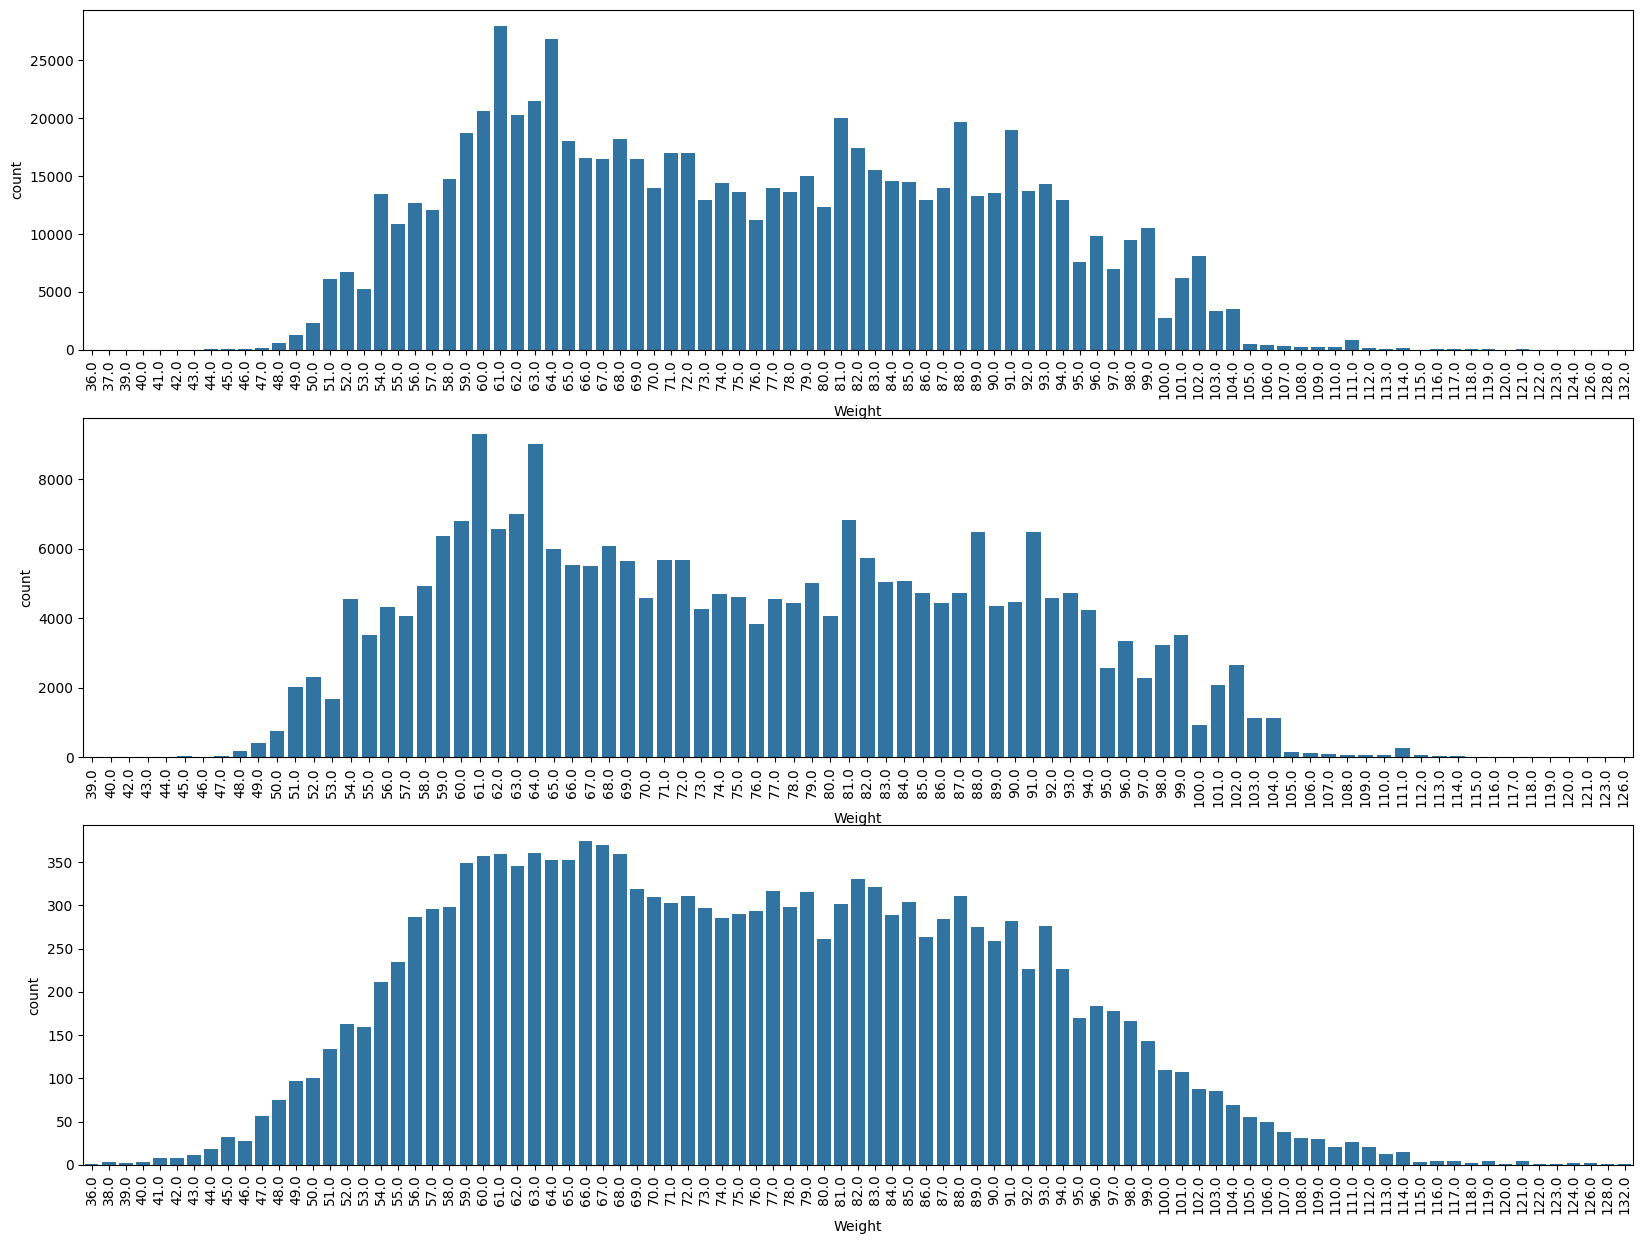

In [205]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Weight",ax=axes[0])
sns.countplot(test, x="Weight",ax=axes[1])
sns.countplot(original, x="Weight",ax=axes[2])

Average weight for people in U.S is around 170 - 190 pounds. Since mean here is around 75, we can probably assume that this is in pounds. Interestingly, there are 2 spikes here as well. Not sure why this is the case. 

**Check Duration**

<Axes: xlabel='Duration'>

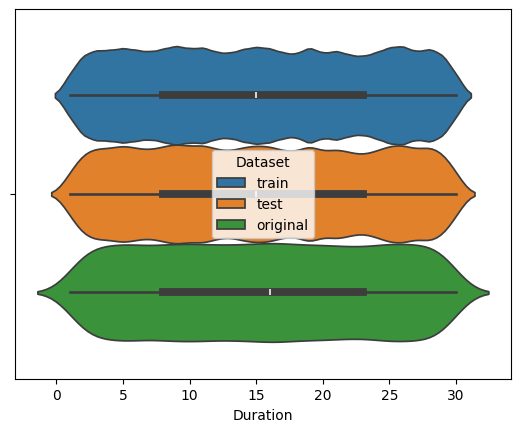

In [206]:
sns.violinplot(df, x="Duration", hue="Dataset")

<Axes: xlabel='Duration', ylabel='count'>

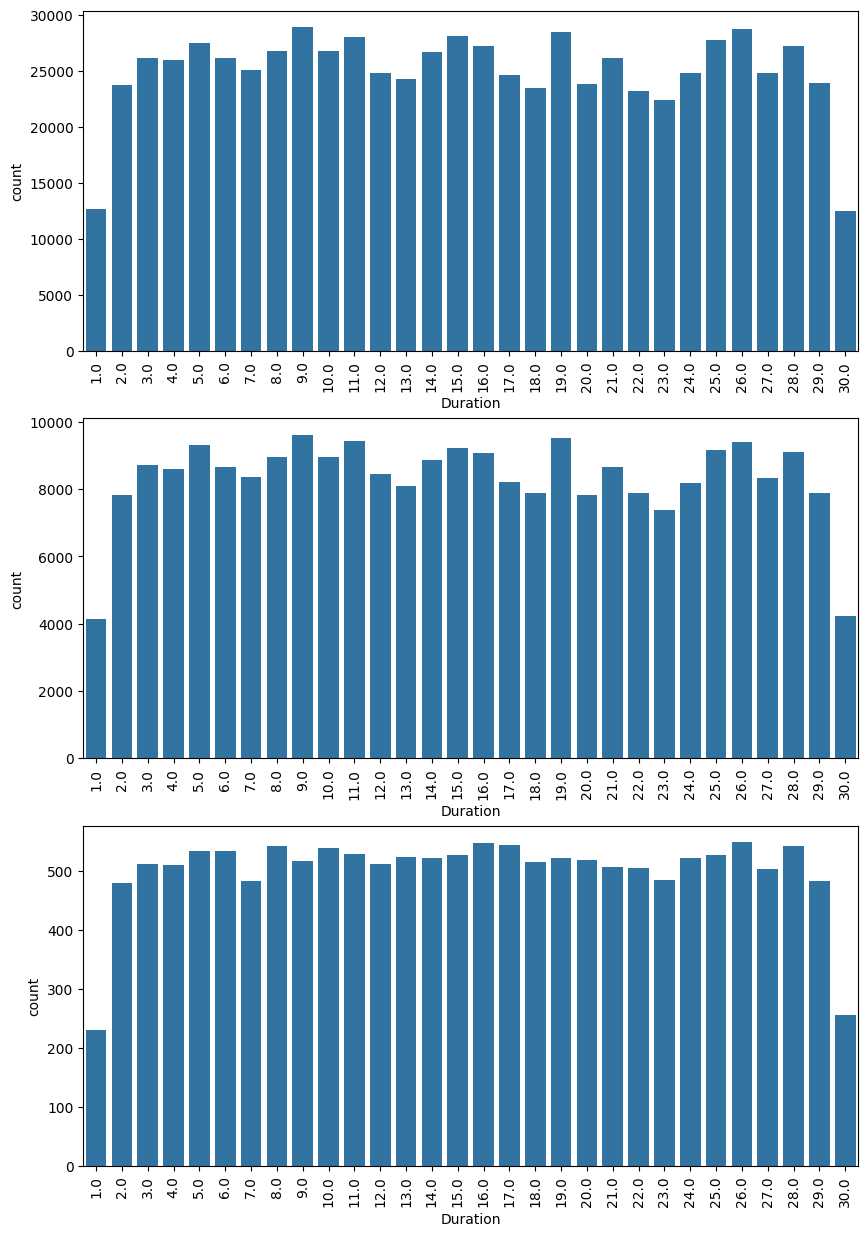

In [207]:
fig, axes = plt.subplots(3,1,figsize=(10,15))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Duration",ax=axes[0])
sns.countplot(test, x="Duration",ax=axes[1])
sns.countplot(original, x="Duration",ax=axes[2])

The tails for duration are rare. Looks very uniform. Most likely in minutes when compared to Calories .

**Check Heart Rate**

<Axes: xlabel='Heart_Rate'>

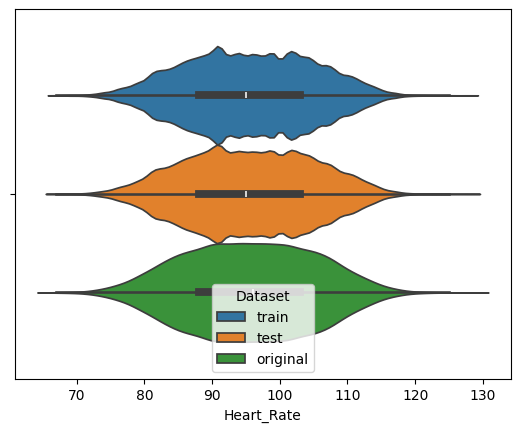

In [208]:
sns.violinplot(df, x="Heart_Rate", hue="Dataset")

<Axes: xlabel='Heart_Rate', ylabel='count'>

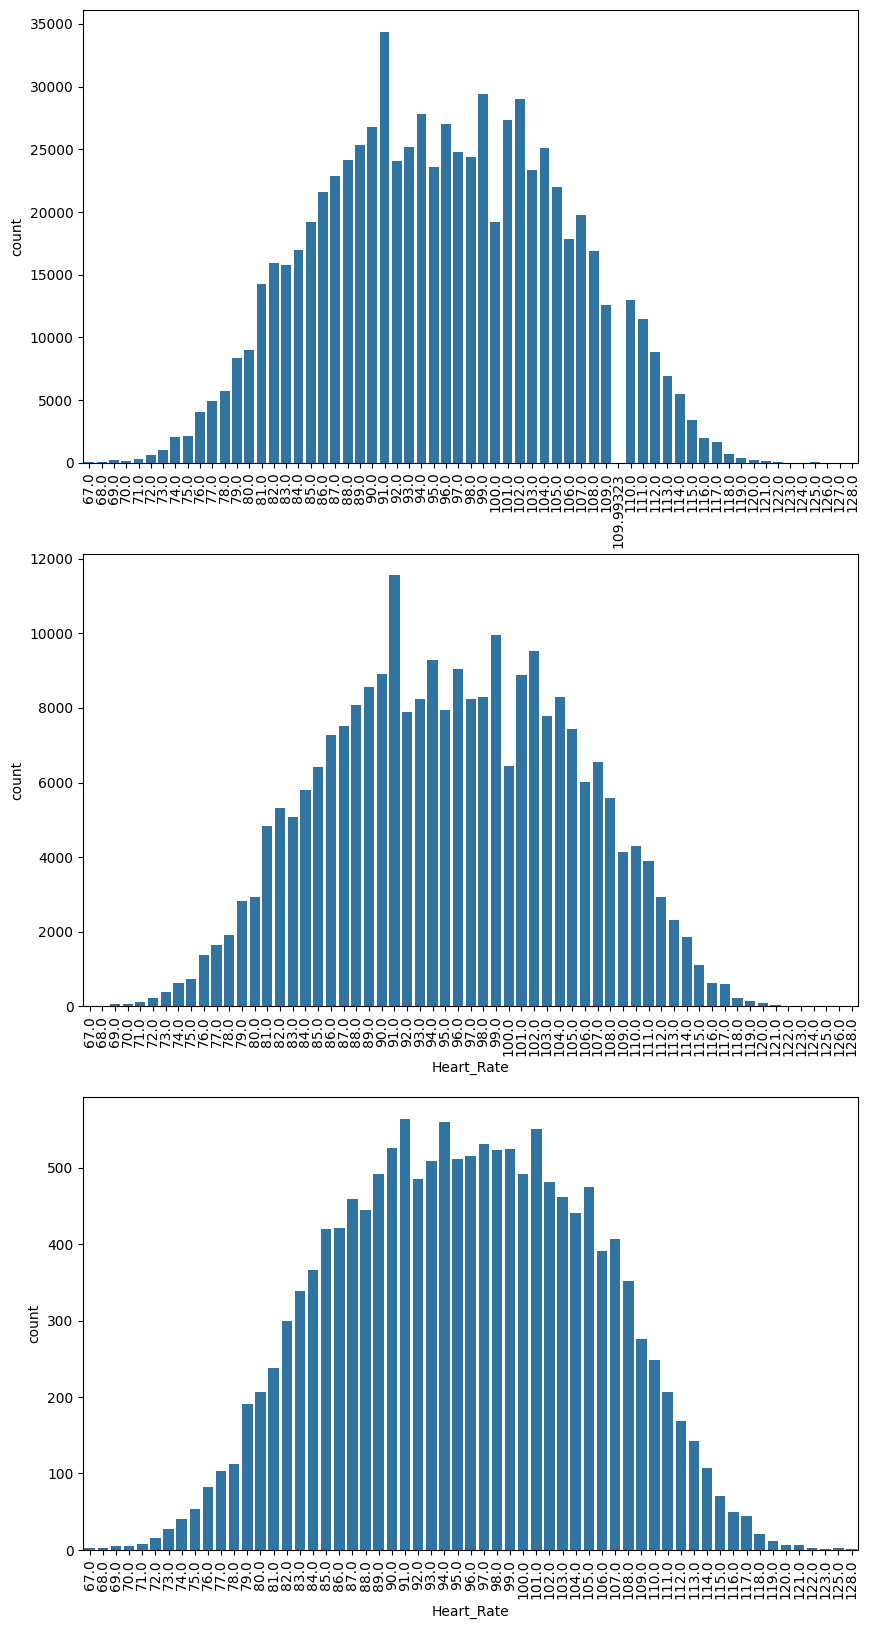

In [209]:
fig, axes = plt.subplots(3,1,figsize=(10,20))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Heart_Rate",ax=axes[0])
sns.countplot(test, x="Heart_Rate",ax=axes[1])
sns.countplot(original, x="Heart_Rate",ax=axes[2])

In [210]:
train[train["Heart_Rate"]==109.99323] # odd female with odd heart rate

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
156040,156040,female,21,162.0,61.0,27.0,109.99323,40.9,169.0,train


~109.99 Heart Rate. Similar to the female with odd Height. However, these are different people. 

<Axes: xlabel='Body_Temp'>

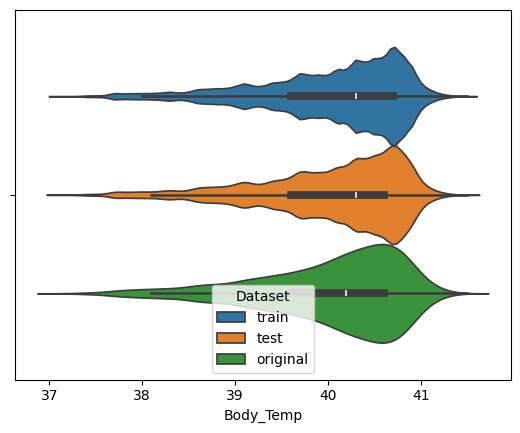

In [211]:
sns.violinplot(df, x="Body_Temp", hue="Dataset")

<Axes: xlabel='Body_Temp', ylabel='Count'>

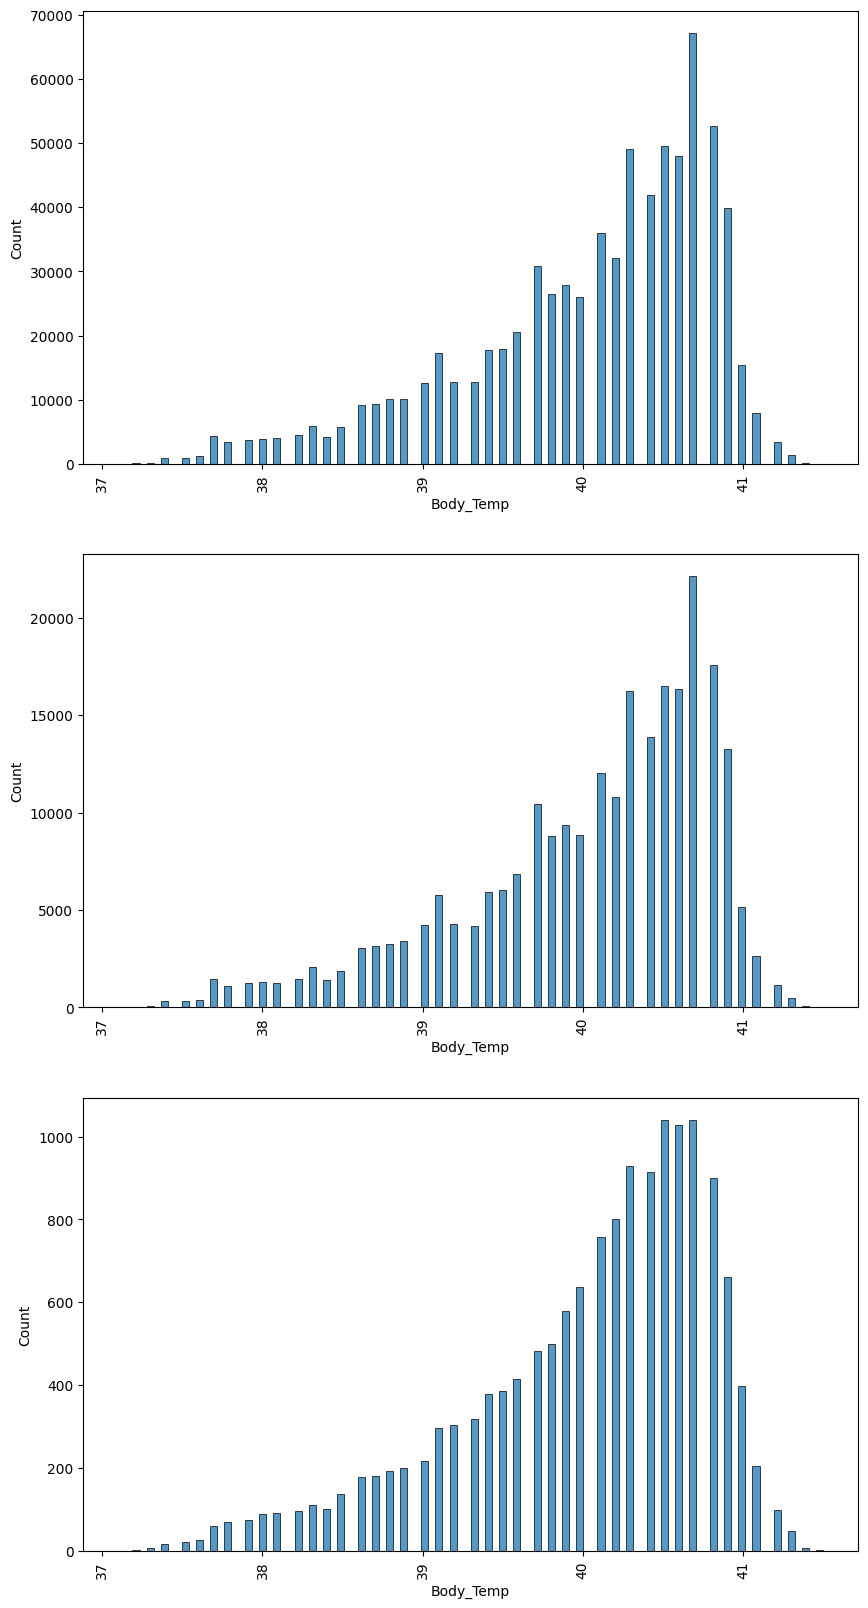

In [212]:
fig, axes = plt.subplots(3,1,figsize=(10,20))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.histplot(train, x="Body_Temp",ax=axes[0], bins=100)
sns.histplot(test, x="Body_Temp",ax=axes[1], bins=100)
sns.histplot(original, x="Body_Temp",ax=axes[2], bins=100)

In [213]:
train["Body_Temp"].unique().shape[0]

75

Body temperature is most likely in celsius. Also negatively skewed. However, this is even more confusing. Many values have really precise digits for temperature. There are only 75 unique temps for training set. Given there are many points for training and original, this indicates that it was sampled to closest weight.

<Axes: xlabel='Calories', ylabel='Count'>

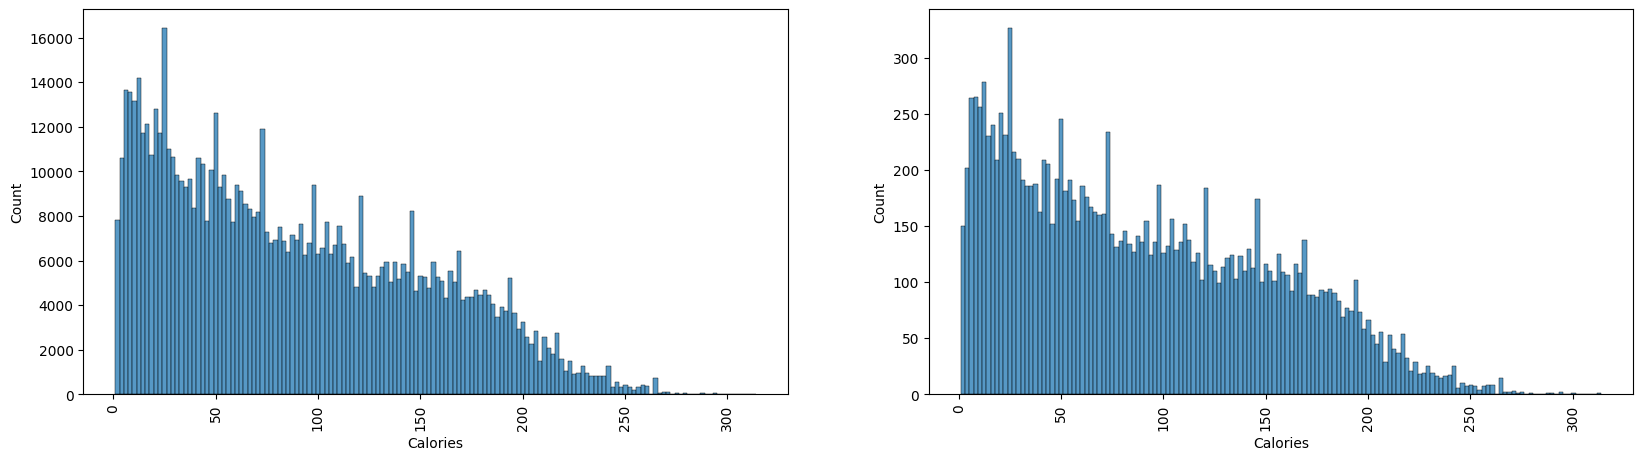

In [214]:
fig, axes = plt.subplots(1,2,figsize=(20, 5))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)

sns.histplot(train, x="Calories",ax=axes[0], bins=150)
sns.histplot(original, x="Calories",ax=axes[1], bins=150)

Positive skew. This time however, the distributions between train and original look highly similar. There are still spikes in the distributions though. 

<Axes: xlabel='Calories'>

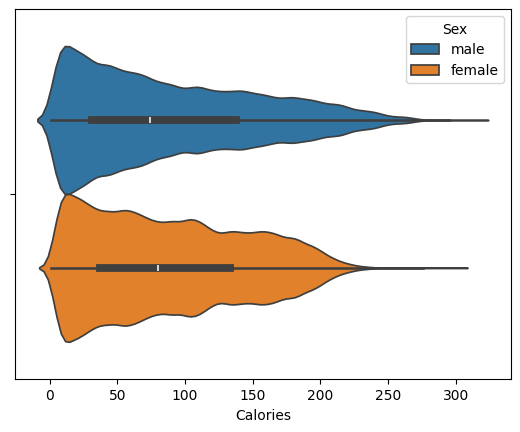

In [215]:
sns.violinplot(to_df, x="Calories", hue="Sex")

Slightly higher calories burned on average for females. 

**Check Age and Body Temp vs Calories**

In [216]:
def generate_heat_map_binning(df, label, bins, target):
    hmap_train = df[[label, target]]
    hmap_train[label] = pd.cut(hmap_train[label], bins=bins)
    hmap_train[target] = pd.cut(hmap_train[target], bins=bins)
    heatmap_data = pd.crosstab(hmap_train[label], hmap_train[target])
    return heatmap_data

C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[label] = pd.cut(hmap_train[label], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[target] = pd.cut(hmap_train[target], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: xlabel='Calories', ylabel='Body_Temp'>

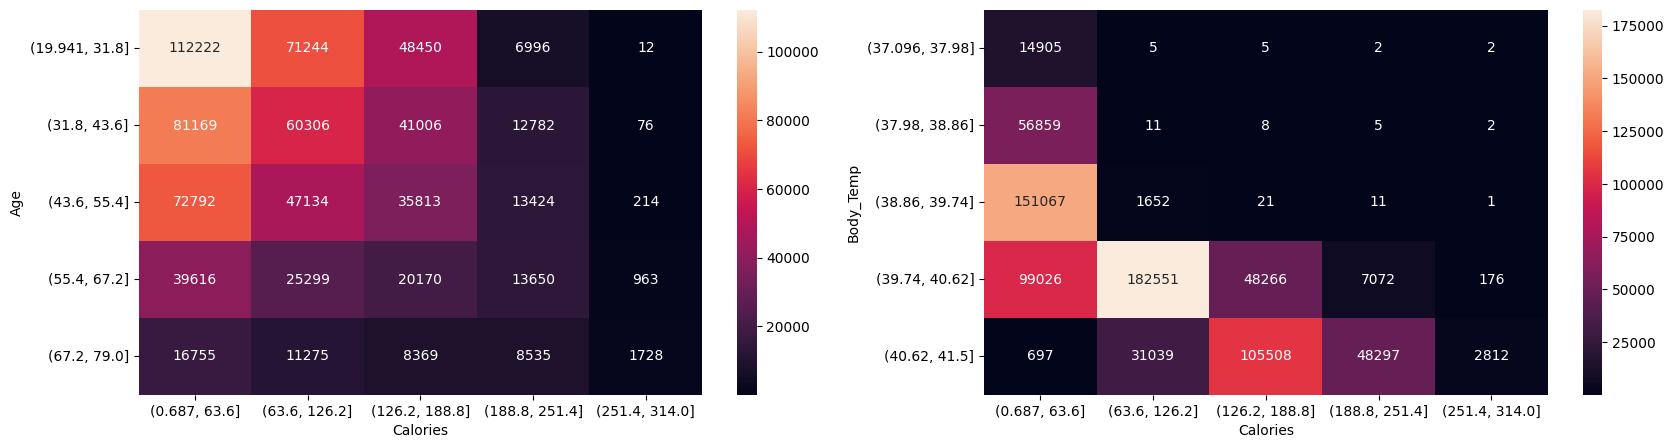

In [217]:
fig,axes = plt.subplots(1,2,figsize=(20, 5))

sns.heatmap(generate_heat_map_binning(train, "Age", bins=5, target="Calories"), annot=True, fmt="d",ax=axes[0])
sns.heatmap(generate_heat_map_binning(train, "Body_Temp", bins=5, target="Calories"), annot=True, fmt="d",ax=axes[1])

People that burn a lot of calories (on the high end) are on average older. However, for different ages, the distributions look the same. Not conclusive yet. Body Temp is also interesting. It's very linear. If we increase body temp, on average there are more calories being burned. 

**Check Height and Weight vs Calories**

C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[label] = pd.cut(hmap_train[label], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[target] = pd.cut(hmap_train[target], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: xlabel='Calories', ylabel='Weight'>

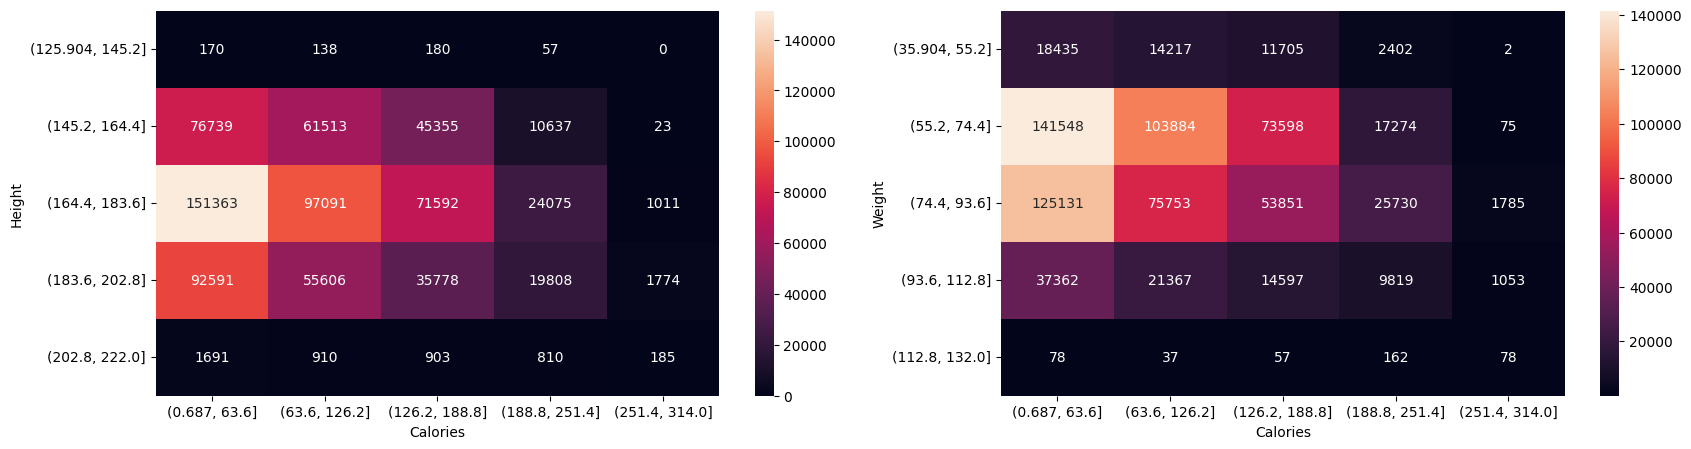

In [218]:
fig,axes = plt.subplots(1,2,figsize=(20, 5))

sns.heatmap(generate_heat_map_binning(train, "Height", bins=5, target="Calories"), annot=True, fmt="d",ax=axes[0])
sns.heatmap(generate_heat_map_binning(train, "Weight", bins=5, target="Calories"), annot=True, fmt="d",ax=axes[1])

Height looks pretty normal. Hard to see how height affects calories. Similar situation with weight.

**Check Duration and Heart Rate vs Calories**

C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[label] = pd.cut(hmap_train[label], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[target] = pd.cut(hmap_train[target], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: xlabel='Calories', ylabel='Heart_Rate'>

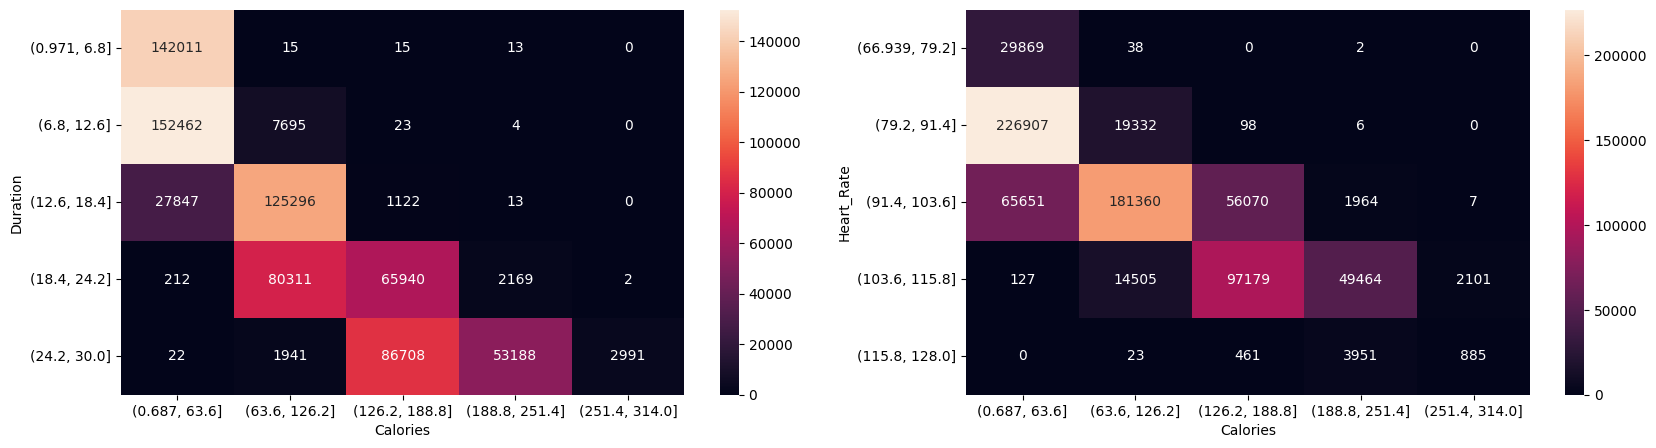

In [219]:
fig,axes = plt.subplots(1,2,figsize=(20, 5))

sns.heatmap(generate_heat_map_binning(train, "Duration", bins=5, target="Calories"), annot=True, fmt="d",ax=axes[0])
sns.heatmap(generate_heat_map_binning(train, "Heart_Rate", bins=5, target="Calories"), annot=True, fmt="d",ax=axes[1])

What an interesting find. Duration was uniformly distribution before. If we consider calories into the picture, we can see more duration leads to more calories being burned. Makes sense. Same situation with heart rate.

**Check Height vs Weight and Heart Rate vs Body Temp**

C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[label] = pd.cut(hmap_train[label], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[target] = pd.cut(hmap_train[target], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: xlabel='Body_Temp', ylabel='Heart_Rate'>

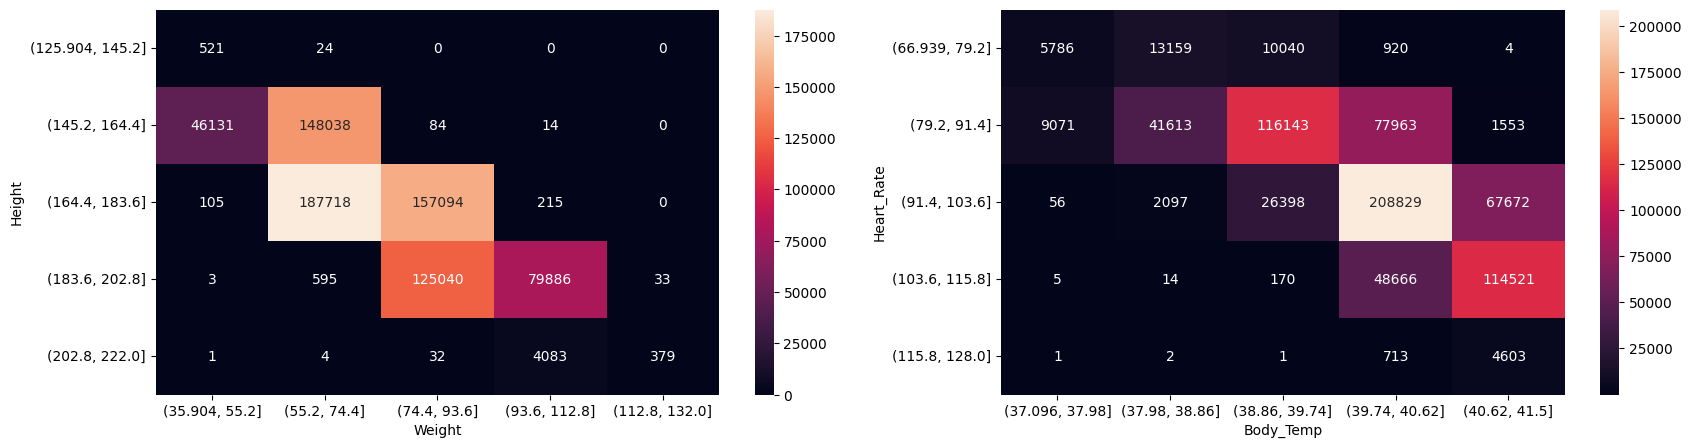

In [229]:
fig,axes = plt.subplots(1,2,figsize=(20, 5))

sns.heatmap(generate_heat_map_binning(train, "Height", bins=5, target="Weight"), annot=True, fmt="d",ax=axes[0])
sns.heatmap(generate_heat_map_binning(train, "Heart_Rate", bins=5, target="Body_Temp"), annot=True, fmt="d",ax=axes[1])

Height and weight + HR and body temp are correlated.

**Check Duration vs HR and Duration vs Body Temp**

C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[label] = pd.cut(hmap_train[label], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_train[target] = pd.cut(hmap_train[target], bins=bins)
C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\2038084500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: xlabel='Body_Temp', ylabel='Duration'>

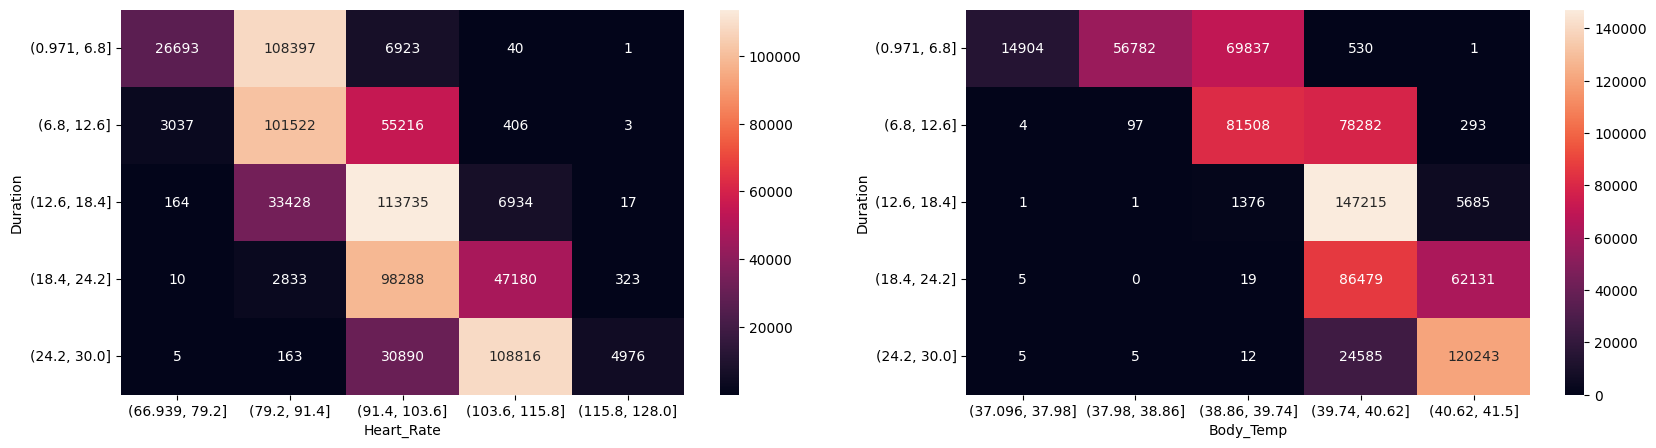

In [230]:
fig,axes = plt.subplots(1,2,figsize=(20, 5))

sns.heatmap(generate_heat_map_binning(train, "Duration", bins=5, target="Heart_Rate"), annot=True, fmt="d",ax=axes[0])
sns.heatmap(generate_heat_map_binning(train, "Duration", bins=5, target="Body_Temp"), annot=True, fmt="d",ax=axes[1])

Correlation between duration and HR + duration and body temp are correlated.

**Check bivariate against Sex**

<Axes: xlabel='Body_Temp'>

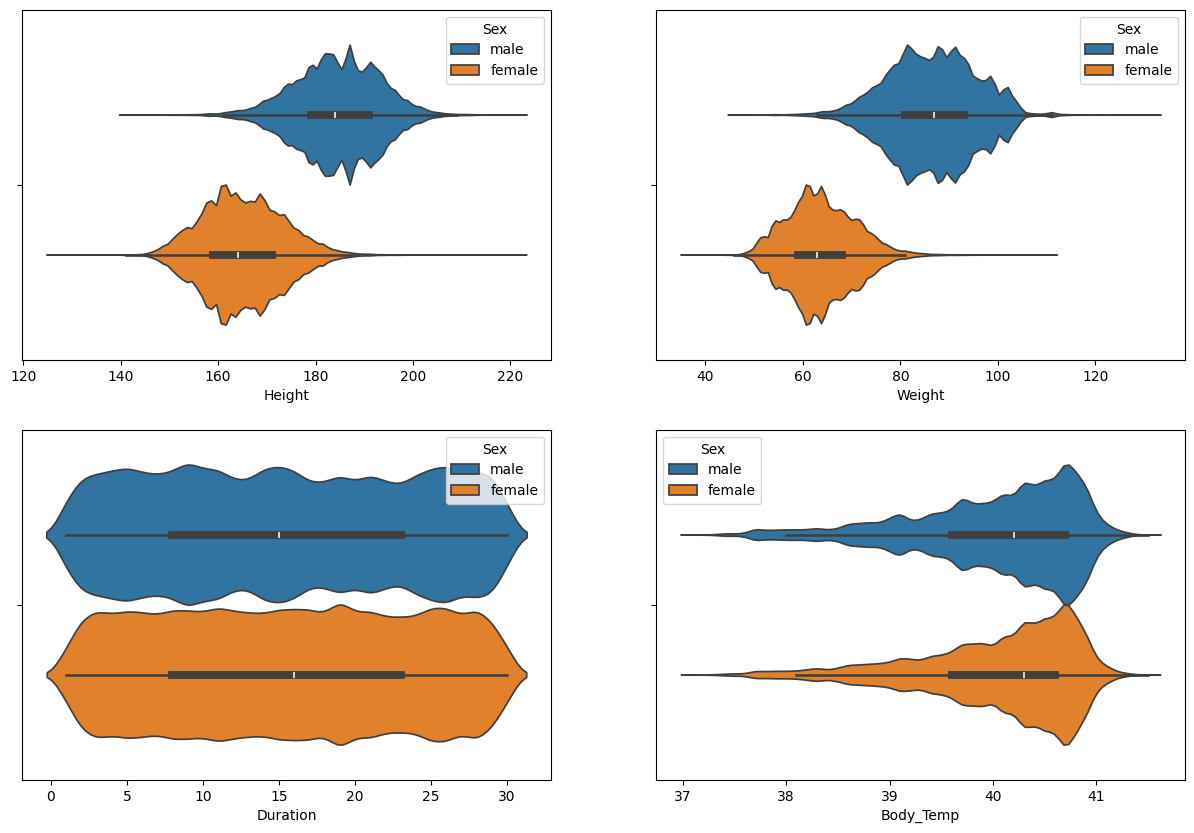

In [263]:
fig,axes = plt.subplots(2,2,figsize=(15,10))

sns.violinplot(train,x="Height",hue="Sex",ax=axes[0][0])
sns.violinplot(train,x="Weight",hue="Sex",ax=axes[0][1])
sns.violinplot(train,x="Duration",hue="Sex",ax=axes[1][0]) # females do workouts for longer on average
sns.violinplot(train,x="Body_Temp",hue="Sex",ax=axes[1][1]) # females have higher body temp on average

Clearly height and weight are vastly different for Male and Female. Interestingly however, females do longer workouts on average. Not sure why this is the case.

**Check correlation heatmap**

In [238]:
corr_df = train.drop(['id', 'Sex', 'Dataset'], axis=1)
corr_mat = corr_df.corr()
corr_mat

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


<Axes: >

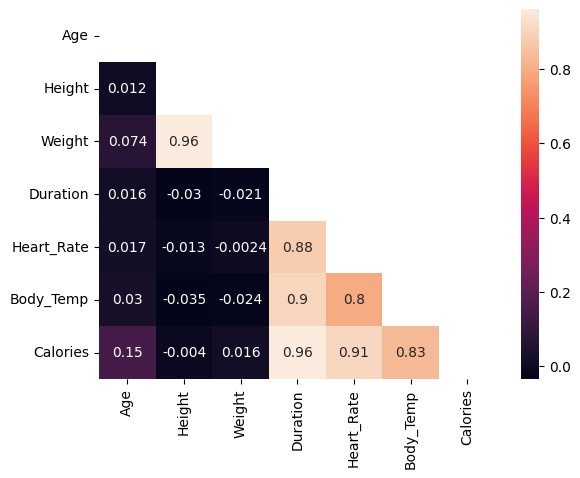

In [248]:
one = np.ones((corr_mat.shape[0],corr_mat.shape[0]))
mask = np.triu(one)
sns.heatmap(corr_mat, mask=mask, annot=True)

As I suspected, not much correlation between Height+Weight vs Calories. Interestingly however, age has some correlation with calories. 

C:\Users\abhin\AppData\Local\Temp\ipykernel_42288\1167615851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_train_df = age_binned_train.groupby(["Age"])["Calories"].mean().reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(19.941, 25.9]'),
  Text(1, 0, '(25.9, 31.8]'),
  Text(2, 0, '(31.8, 37.7]'),
  Text(3, 0, '(37.7, 43.6]'),
  Text(4, 0, '(43.6, 49.5]'),
  Text(5, 0, '(49.5, 55.4]'),
  Text(6, 0, '(55.4, 61.3]'),
  Text(7, 0, '(61.3, 67.2]'),
  Text(8, 0, '(67.2, 73.1]'),
  Text(9, 0, '(73.1, 79.0]')])

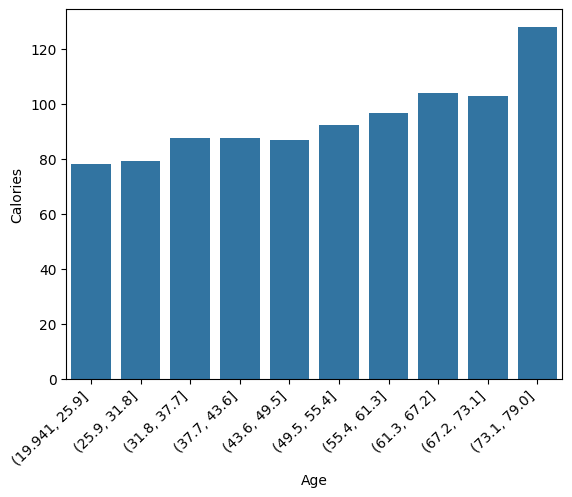

In [ ]:
cut_age = pd.cut(train["Age"], bins=10)
age_binned_train = train.copy()
age_binned_train["Age"] = cut_age
age_train_df = age_binned_train.groupby(["Age"])["Calories"].mean().reset_index() # average calories for age group
sns.barplot(age_train_df,x="Age",y="Calories")
plt.xticks(rotation=44, ha='right')

As it turns out, this is the correlation we see in Age vs Calories. As age increases, calories burned also tend to increase. 